In [0]:
import pandas as pd
import seaborn as sns
from pyspark.sql import Row, Column
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from scipy.stats import t, pearsonr, f_oneway
import numpy as np

In [0]:
file_location_courses = 'dbfs:/FileStore/udemy_courses.csv'

schema_courses = StructType(
    [
        StructField('id',LongType(), False),
        StructField('title',StringType(), False),
        StructField('url',StringType(), False),
        StructField('is_paid',BooleanType(), False),
        StructField('instructor_names', StringType(), False),
        StructField('category', StringType(), False),
        StructField('headline', StringType(), False),
        StructField('num_subscribers',LongType(), False),
        StructField('rating',FloatType(), False),
        StructField('num_reviews', LongType(), False),
        StructField('instructional_level', StringType(), False),
        StructField('objectives',StringType(), False),
        StructField('curriculum', StringType(), False)
    ]
)
df_course = spark.read.csv(file_location_courses, encoding="UTF-8", header = True, schema = schema_courses)
df_course = df_course.dropna()
display(df_course)

id title url is_paid instructor_names category headline num_subscribers rating num_reviews instructional_level objectives curriculum 2070359 Create Board and Video Game Design Projects - 4 Courses in 1 https://www.udemy.com/course/game-design-masterclass-board-and-digital-onedaycode/ true One Day Code - John Haste Development Start designing your own Games (Videogame or Board Games) from scratch, using Game Design Theory and Project Management 2732 3.6958094 156 Beginner Level Understand what makes a game be a good game Develop Simple Game Prototypes With Construct 2 Get to know in which area of the Game Industry the student fits better Introduction - Game Structure, Introduction, What is a Game?, Game Types (Digital, Analog, Gamification), How to Rate the course, Game Loops, Join Our Discord Server ?, Game Arcs, Quizz 1, Presentations for Download, Slides Presentation - Game Design Introduction - Download, Slides Presentation - Game Design Canvas- Download, Slides Presentation - Digital Games - Download, Slides Presentation - Board Games - Download, Templates for Download, Template - Game Design Document (Digital Games), Template - Game Design Document (Board Games), Template - Game Design Canvas, Template - Game Design Structure Analysis, Introduction - Game Industry, Game Careers (Part 1), Game Careers (Part 2), Game Industry, Game Purposes, Quizz 2, Introduction - Game Layers, Game Layers - How to separate elements, Tutorials - How to teach the player, Licensing - How to get free assets, Quizz 3, Introduction - Development, Game Design Document, Crowdfunding, Publishing, Top 10 Game Designer Mistakes, Quizz 4, Game Design Canvas - Introduction, Introduction, The Game Design Canvas Semaphore, Brainstorming, Your First Game, Project Management - Kanban Trello, Game Purposes, Quizz, Game Design Canvas - Pre Definitions (Red Sign), Platforms, Number Of Players, Target Audience, Duration, Quizz, Game Design Canvas - Core Gameplay - Yellow Sign, Genre, Mechanics, Story And Theme, Aesthetics, Quizz, Core Gameplay - Gameplay - Green Sign, Goals, Interaction, Obstacles, Rules, Quizz, Digital Games - Introduction, History of Video Game Home Consoles - Part 1, History of Video Game Home Consoles - Part 2, History of Video Game Home Consoles - Part 3, History of Video Game Home Consoles - Part 4, Game Engines, Inputs and Button Patterns (Biases of Familiarity), Quizz, Digital Games - Game Moments, Feedback Types, Game Flow and Transitions, Quizz, Digital Games - Game Elements, Progression and Level Design, Game Elements, Animations, Edit Animations With Gimp, Sound and Music, Edit Audio With Audacity, Digital Game Genres - Part 1, Digital Game Genres - Part 2, Quizz, Digital Games - Prototyping with Construct 2, Prototyping with Paint and Google Slides, Prototyping with Construct 2 - Installation, Prototyping with Construct 2 - Templates, Prototyping with Construct 2 - Simple Platformer, Prototyping with Construct 2 - Lives and GUI, Prototyping with Construct 2 - Enemies and Shoot Bullets, Playtests, Monetization, Quizz, Board Games - Introduction, History - Ancient Games, History - New Games, Quizz, Board Games - Game Components, Game Components, Components Feel, Game Aesthetics, Quizz, Board Games - Game Moments and Types, Game Genres, Game Tutorials, Game Moments, Game Mechanics, Quizz, Board Games - Prototyping Your First Game, Paint Prototypes, Google Slides (Play Online), Icons For Your Game (Flaticon), Marketing and Card Templates (Canva), Physical Components, Your Game Structure (Gdd Template), Board Games - Playtesting and Publishing, Game Scope and Expansions, Publishing Costs and Distribution, Quizz, Extra - Mathematics, Introduction to Math, Percentages and Simplification, Multiple Events - Part 1, Multiple Events - Part 2, Possibilites Interval, Balancing a Game, The End, Thank you! 3818538 Full Stack React Js with Redux, Node.Js, Express.Js, MongoDB https://www.udemy.com/course/full-stack-react-js-with-redux-nodejs-expre

In [0]:
n = df_course.count()
df = n-2
t_critical = t.ppf(1-0.05,df)

r_critical = t_critical/((t_critical**2 + df)**0.5)
print(f"Critical value (r_c) is: {r_critical}")

Critical value (r_c) is: 0.0054056205883106475


<h1>Pearson's correlation test</h1>
<p>The Product Moment Correlation Coefficiont (PMCC), or r, is a measure of how strongly related 2 variables are. Our sample size is 92591 and our alpha value is 0.05. Calculated critical value is 0.0054</p>
<h2>Relationship between ispaid and num_subscribers</h2>
<p><b>Null Hypothesis</b> - There is no correlation between whether the course <b>is paid</b> for and its <b>attendance</b></p>
<p><b>Alternate Hypothesis</b> - There is a negative correlation between whether the course <b>is paid</b> for and its <b>attendance</b>

In [0]:
df_course = df_course.withColumn("is_paid_numeric", col("is_paid").cast("long"))
corr_analysis_df = df_course.select("is_paid_numeric", "num_subscribers")

vector_col = "col-features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)

matrix = Correlation.corr(df_vector, vector_col).head()[0]
corr_matrix = matrix.toArray().tolist()

columns = ['is_paid_numeric', 'num_subscribers']
df_corr = spark.createDataFrame(corr_matrix, columns)
df_corr.show()

+--------------------+--------------------+
|     is_paid_numeric|     num_subscribers|
+--------------------+--------------------+
|                 1.0|-0.03943171538641852|
|-0.03943171538641852|                 1.0|
+--------------------+--------------------+



<h2>Relationship between ispaid and num_subscribers</h2>
<p>The correlation coefficient of -0.039 means that there is a very weak negative correlation between the two variables. There is no significant relationship between the number of subscribers and whether the course is paid for.
</p>
<p>But Since |r| > r_c, null hypothesis is rejected</p>

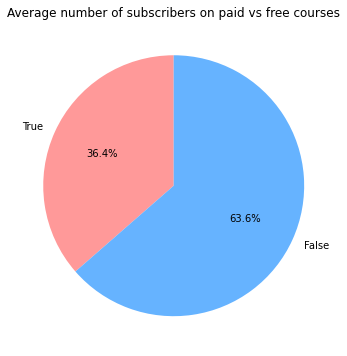

In [0]:
df_avg_subscribers = df_course.groupBy("is_paid").agg(
    avg("num_subscribers").alias("avg_num_subscribers")
)
df_avg_subscribers = df_course.groupBy("is_paid").agg({"num_subscribers": "avg"})

df_avg_subscribers = df_avg_subscribers.withColumnRenamed("avg(num_subscribers)", "avg_num_subscribers")

df_avg_subscribers_pd = df_avg_subscribers.toPandas()

plt.figure(figsize=(6, 6))
plt.pie(df_avg_subscribers_pd['avg_num_subscribers'], 
        labels=df_avg_subscribers_pd['is_paid'].astype(str),  # Pretvaranje bool u string za prikaz ('True' i 'False')
        autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff'], 
        startangle=90)

plt.title('Average number of subscribers on paid vs free courses')

plt.show()

<h2>Relationship between level of the course and its subscribers</h2>
<p><b>Null Hypothesis</b> - There is no correlation in the <b>difficulty of the course</b> and the <b>number of course attendance</b>
<p><b>Alternate Hypothesis</b> - There is negative correlation in the <b>difficulty of the course</b> and the <b>number of course attendance</b>

In [0]:
df_course = df_course.withColumn(
    "instructional_level_numeric",
    when(df_course["instructional_level"] == "Begginer Level", 1)
    .when(df_course["instructional_level"] == "All Levels", 2)
    .when(df_course["instructional_level"] == "Intermediate Level", 3)
    .when(df_course["instructional_level"] == "Expert Level", 4)
    .otherwise(1)
)

In [0]:
df_course = df_course.withColumn("instructional_level_numeric", col("instructional_level_numeric").cast("long"))

In [0]:
corr_analysis_df = df_course.select("instructional_level_numeric", "num_subscribers")

vector_col = "col-features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)

matrix = Correlation.corr(df_vector, vector_col).head()[0]
corr_matrix = matrix.toArray().tolist()

columns = ['instructional_level_numeric', 'num_subscribers']
df_corr = spark.createDataFrame(corr_matrix, columns)
df_corr.show()


+---------------------------+--------------------+
|instructional_level_numeric|     num_subscribers|
+---------------------------+--------------------+
|                        1.0|-0.01408155911875663|
|       -0.01408155911875663|                 1.0|
+---------------------------+--------------------+



In [0]:
x = df_course.toPandas()["instructional_level_numeric"]
y = df_course.toPandas()["num_subscribers"]

<p>Since |r| > r_c, but its not close to -1 we can reject null hypothesis and say that there is some kind of relationship between course level and number of subscribers, but its not strong enough to say that it has a strong relationship.</p>

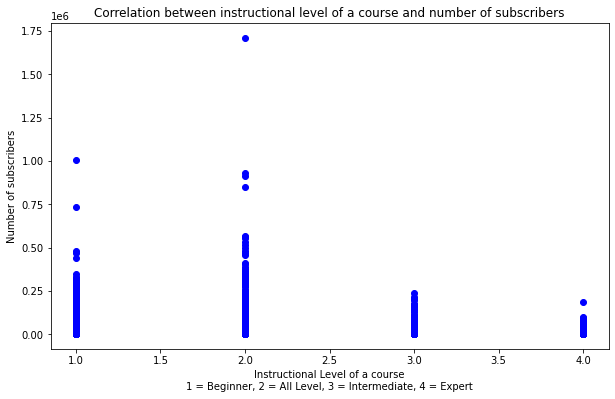

In [0]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=1, color="blue")
plt.xlabel("Instructional Level of a course\n1 = Beginner, 2 = All Level, 3 = Intermediate, 4 = Expert")
plt.ylabel("Number of subscribers")
plt.title("Correlation between instructional level of a course and number of subscribers")
plt.show()

<h1>Analysis of num_subscribers and other possible influences on their number</h1>
<h2>Counts of different categories and its total subscribers</h2>
<p>The aim of this analysis is to check the demand of the categories</p>
<h2>The ratio of the number of reviews to the number of subscribers</h2>
<p>In this part of the analysis, we check the relationship between the reviews left and the number of people who completed the course</p>
<h2>Which category of instructional levels leaves more reviews</h2>
<p>The goal of this analysis is to check whether people with a higher instructional level leave more reviews than others</p>
<h2>Average rating of courses of different categories</h2>
<p>The goal is to see which courses stand out by average rating</p>

In [0]:
df_course_categories = df_course.groupBy('category')\
                    .agg(sum('num_subscribers').alias('total_subscribers')).orderBy(desc('total_subscribers'))

df_reviews_subscribers = df_course\
                        .agg(sum('num_subscribers').alias('total_subscribers'),
                        sum('num_reviews').alias('total_reviews'))
df_reviews_subscribers = df_reviews_subscribers.withColumn('ratio', col('total_reviews') / col('total_subscribers')*100)

df_reviews_by_level = df_course.groupBy('instructional_level')\
        .agg(sum("num_reviews").alias("total_reviews"),sum('num_subscribers').alias('total_subscribers')).orderBy(desc('total_reviews'))

df_reviews_by_level = df_reviews_by_level.withColumn('ratio',col('total_reviews') / col('total_subscribers') * 100)
df_reviews_by_level = df_reviews_by_level.orderBy(desc('ratio'))

df_rating_categories = df_course.groupBy('category').agg(
  avg('rating').alias('average_rating')
).orderBy(desc('average_rating'))
          
df_course_categories.show()            
df_rating_categories.show()
df_reviews_by_level.show()
df_reviews_subscribers.show()

+--------------------+-----------------+
|            category|total_subscribers|
+--------------------+-----------------+
|       IT & Software|         92816631|
|            Business|         71144630|
|              Design|         40614801|
|           Marketing|         40070857|
|Personal Development|         30277536|
|Finance & Accounting|         28025985|
|Teaching & Academics|         27220326|
| Office Productivity|         25773073|
|         Development|         21253936|
| Photography & Video|         13776390|
|    Health & Fitness|         11824997|
|           Lifestyle|         10129703|
|               Music|          8316217|
+--------------------+-----------------+

+--------------------+------------------+
|            category|    average_rating|
+--------------------+------------------+
|Personal Development| 4.372109475486455|
|Teaching & Academics| 4.293846729356446|
|            Business| 4.266214432683095|
|       IT & Software|4.2478091068354695|
|       

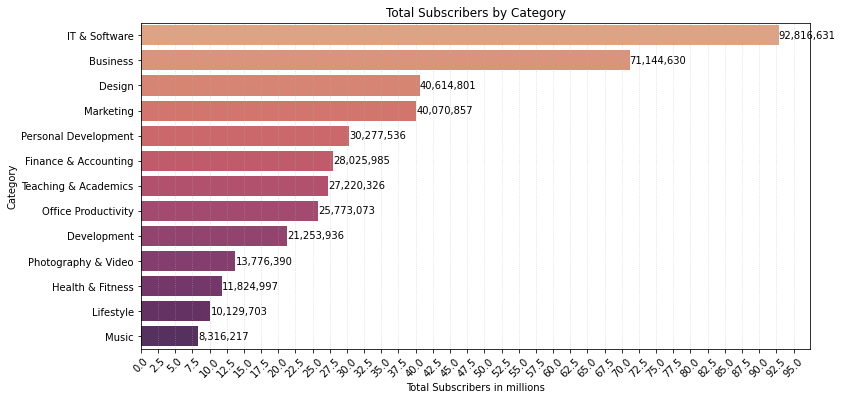

In [0]:

df_course_categories_pd = df_course_categories.toPandas()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="total_subscribers", y="category", data=df_course_categories_pd, palette="flare")

for p in ax.patches:
    ax.text(p.get_width() + 1000, p.get_y() + p.get_height() / 2, f"{int(p.get_width()):,}", va='center', fontsize=10)

plt.grid(axis='x', linestyle='dotted', alpha=0.5)

plt.xlabel("Total Subscribers in millions")
plt.ylabel("Category")
plt.title("Total Subscribers by Category")
plt.xticks(np.arange(0,97.5e6,2.5e6),rotation=45)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)/1e6:,}'))
plt.show()

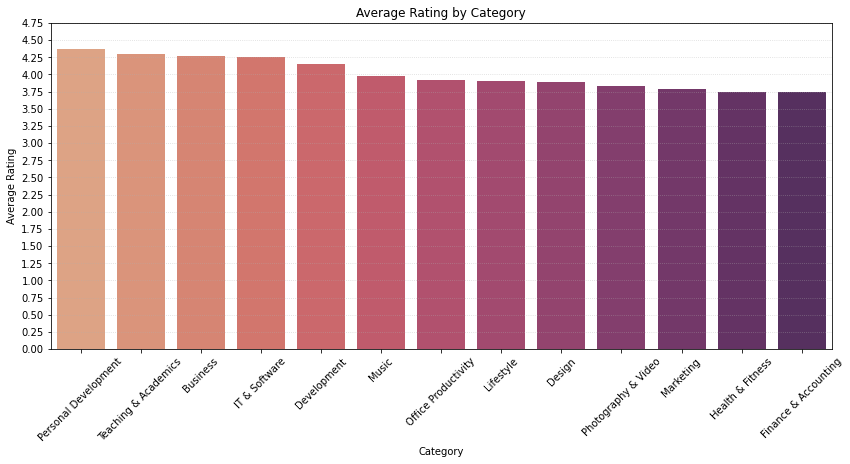

In [0]:
df_rating_categories_pd = df_rating_categories.toPandas()

plt.figure(figsize=(14, 6))
ax = sns.barplot(x="category", y="average_rating", data=df_rating_categories_pd, palette="flare")

plt.grid(axis='y', linestyle='dotted', alpha=0.5)

plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.title("Average Rating by Category")
plt.yticks(np.arange(0,5,0.25))
plt.xticks(rotation=45)
plt.show()


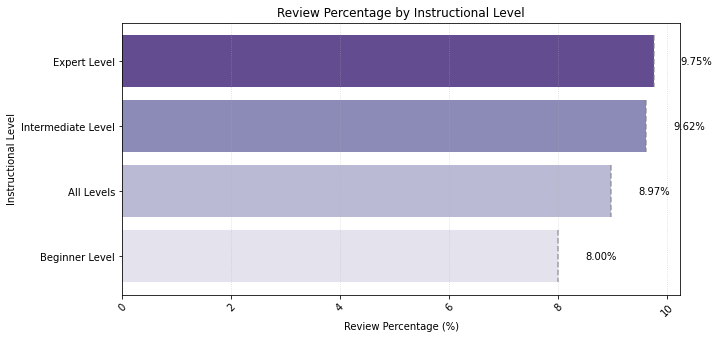

In [0]:
plt.figure(figsize=(10, 5))
df_reviews_by_level_pd = df_reviews_by_level.toPandas()
ax = sns.barplot(x="ratio", y="instructional_level", data=df_reviews_by_level_pd, palette="Purples_r")

for p in ax.patches:
    ax.plot([p.get_width(), p.get_width()], [p.get_y(), p.get_y() + p.get_height()], linestyle="dashed", color="gray", alpha=0.7)
    ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, f"{p.get_width():.2f}%", va='center', fontsize=10)

plt.grid(axis='x', linestyle='dotted', alpha=0.5)

plt.xlabel("Review Percentage (%)")
plt.ylabel("Instructional Level")
plt.title("Review Percentage by Instructional Level")
plt.xticks(rotation=45)
plt.show()

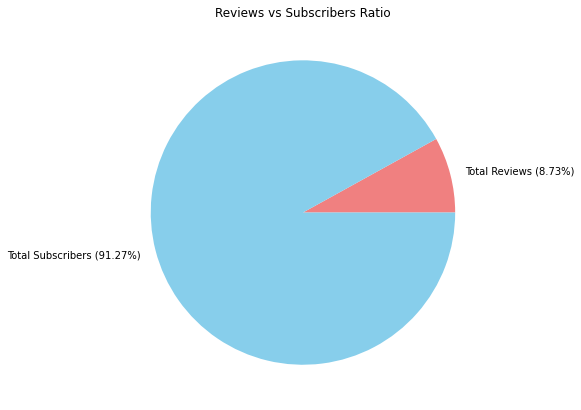

In [0]:
df_reviews_subscribers_pd = df_reviews_subscribers.toPandas()

total_reviews = df_reviews_subscribers_pd["total_reviews"][0]
total_subscribers = df_reviews_subscribers_pd["total_subscribers"][0]
reviews_percentage = (total_reviews / total_subscribers) * 100
subscribers_percentage = 100 - reviews_percentage

plt.figure(figsize=(7, 7))

plt.pie([total_reviews, total_subscribers], 
        labels=[f"Total Reviews ({reviews_percentage:.2f}%)", 
                f"Total Subscribers ({subscribers_percentage:.2f}%)"], 
        colors=["lightcoral", "skyblue"])

plt.title("Reviews vs Subscribers Ratio")
plt.show()


<h2>Counts of different categories and its total subscribers</h2>
<p>We can conclude that the top 3 categories are: IT & Software, Business and Design, while the last 3 categories are Music, Lifestyle and Health and Fitness</p>
<h2>The ratio of the number of reviews to the number of subscribers</h2>
<p>In this research, we concluded that of all participants who attend a course, only 8.73% of them had left a review.</p>
<h2>Which category of instructional levels leaves more reviews</h2>
<p>In this part of the research, we concluded that the expert level and intermediate level give the most reviews, while the beginner level gives the least. The percentage of people giving reviews at the expert and intermediate levels are 9.74 and 9.61 respectively, while at the beginner level the percentage of people giving ratings is 8</p>
<h2>Average rating of courses of different categories</h2>
<p>We can conclude that all courses have an average grade above 3.7. At the very top are Personal Development courses with an average score of 4.37, Teaching and Academics with an average score of 4.29 and Business courses with an average score of 4.26. At the bottom are the courses Finance and accounting with a rating of 3.74, as well as Health and fitness with the same average rating and Marketing with a rating of 3.78</p>

<h1>One way ANOVA</h1>
<h2>Analysis of variation on different levels of instructions and number of subscribers</h2>
<p><b>Null hypothesis</b>: There is no statistically significant difference in the number of subscribers between courses of different levels of instruction (Beginner, Intermediate, Expert, All Levels).</p>
<p><b>Alternative hypothesis</b>There is a statistically significant difference in the average number of subscribers between at least two levels of instruction.</p>

62.923020633984 1.238220919118092e-40


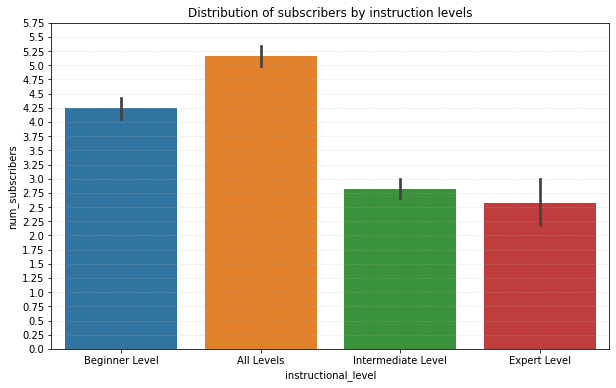

In [0]:
df_anova1P = df_course.select("instructional_level", "num_subscribers").toPandas()

groups = [group["num_subscribers"].dropna().values for _, group in df_anova1P.groupby("instructional_level")]
f_stat, p_value = f_oneway(*groups)
print(f_stat,p_value)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='instructional_level', y='num_subscribers', data=df_anova1P)
plt.title("Distribution of subscribers by instruction levels")
plt.yticks(np.arange(0,6000,250))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{int(y)/1e3:,}'))
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.show()

<h2>Analysis of variation on different levels of instructions and number of subscribers</h2>
<p>F-stat = 62.92 and p-value = 1.238e-40, practically 0</p>
<p>Conclusion: since p-value is < 0.05, we reject null hypothesis and accept alternative hypothesis. There is a statistically significant difference in the average number of subscribers between at least two levels of instruction.</p>

<h1>One way ANOVA</h1>
<h2>Analysis of whether some categories receive more reviews than others</h2>
<p><b>Null hypothesis</b>: There is no statistically significant difference between the categories regarding the number of reviews on them.</p>
<p><b>Alternative hypothesis</b>: There is a statistically significant difference between the categories regarding the number of reviews on them.</p>

66.43460273467149 3.455885382248201e-162


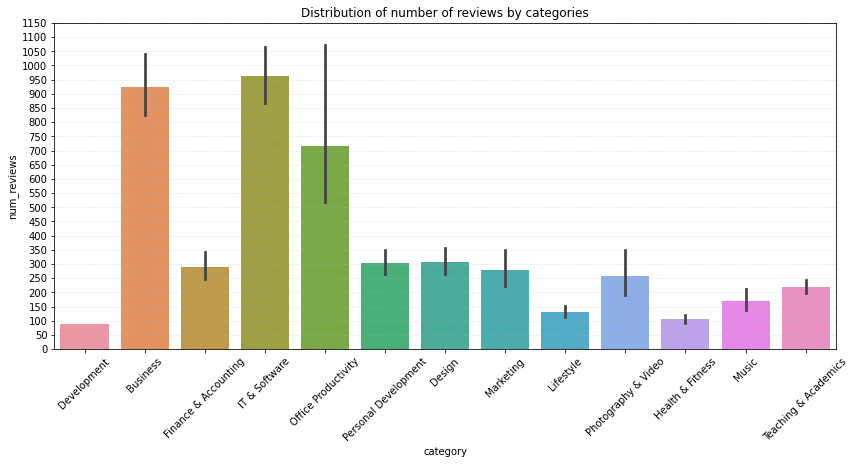

In [0]:
anova_category_df = df_course.select("category", "num_reviews").toPandas()
category_groups = [group["num_reviews"].dropna().values for _, group in anova_category_df.groupby("category")]

f_stat_cat, p_value_cat = f_oneway(*category_groups)
print(f_stat_cat,p_value_cat)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='category', y='num_reviews', data=anova_category_df)
plt.title("Distribution of number of reviews by categories")
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.xticks(rotation=45)
plt.yticks(np.arange(0,1200,50))
plt.show()


<h2>Analysis of whether some categories receive more reviews than others</h2>
<p>The p-value is very small, which means that there is enough evidence to reject the null hypothesis.</p>
<p>The F-statistic is large, indicating that the differences between the categories are significant.
Therefore, based on these results, we can conclude that there is a statistically significant difference between the categories in terms of the number of reviews, and the alternative hypothesis is accepted.</p>

<h1>One way ANOVA</h1>
<h2>Analysis of whether some categories have higher attendance</h2>
<p><b>Null hypothesis</b>: There is no statistically significant difference between the categories regarding the number of course attenders.</p>
<p><b>Alternative hypothesis</b>: There is a statistically significant difference between the categories regarding the number of course attenders.</p>

154.68954262291268 0.0


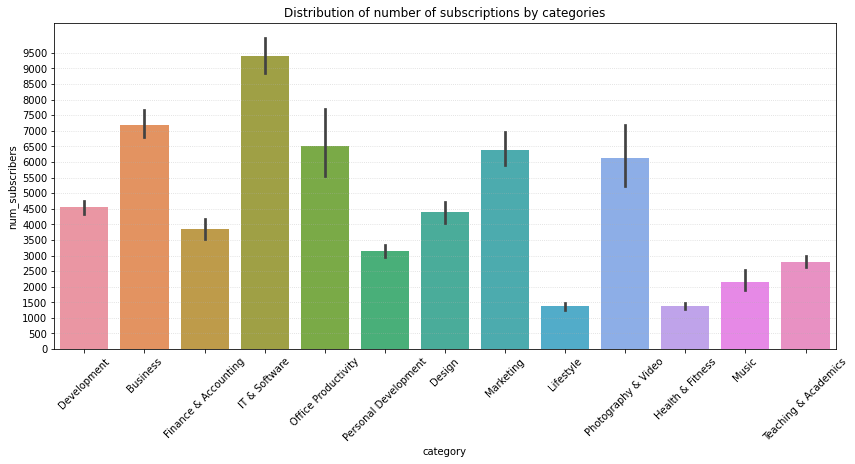

In [0]:
anova_category_sub_df = df_course.select("category", "num_subscribers").toPandas()
category_groups_sub = [group["num_subscribers"].dropna().values for _, group in anova_category_sub_df.groupby("category")]

f_stat_cat, p_value_cat = f_oneway(*category_groups_sub)
print(f_stat_cat,p_value_cat)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='category', y='num_subscribers', data=anova_category_sub_df)
plt.title("Distribution of number of subscriptions by categories")
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.xticks(rotation=45)
plt.yticks(np.arange(0,10000,500))
plt.show()


<h2>Analysis of whether some categories have higher attendance</h2>
<p>The p-value is 0 which means that there is enough evidence to reject the null hypothesis.</p>
<p>The F-statistic is large, indicating that the differences between the categories are significant.
Therefore, based on these results, we can conclude that there is a statistically significant difference between the categories in terms of the number of subscribers, and the alternative hypothesis is accepted.</p>